In [2]:
# Model Development
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('automobileEDA.csv', header=0)
# header=0 specifies that the first row of the CSV file should be treated as 
# the header row, which contains the column names.

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
# Theory of Linear Regression and Multiple Linear Regression
# Simple Linear Regression
# Simple Linear Regression is a method to help us understand the relationship between two variables:

# The predictor/independent variable (X)
# The response/dependent variable (that we want to predict)(Y)
# The result of Linear Regression is a linear function that predicts the response (dependent) 
# variable as a function of the predictor (independent) variable.


In [6]:
# Loading the modules for linear regression
from sklearn.linear_model import LinearRegression

In [7]:
# Creating linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [8]:
# using 'highway-mpg' to predict the price of the car using linear model 
X = df[['highway-mpg']]
Y = df[['price']]


In [9]:
# fitting the linear model using highway-mpg 
lm.fit(X,Y)

LinearRegression()

In [10]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [11]:
# finding the value of intercept(a)
lm.intercept_

array([38423.30585816])

In [12]:
# finding the value of slope(b)
lm.coef_

array([[-821.73337832]])

In [13]:
# creating a linear regression object called lm1
lm1 = LinearRegression()
lm1

LinearRegression()

In [14]:
# Traning the model using engine-size as the independent variable and price as dependent variable
X = df[['engine-size']]
Y = df[['price']]
lm1.fit(X,Y)


LinearRegression()

In [15]:
# finding the slope and intercept of the model
lm1.coef_

array([[166.86001569]])

In [16]:
lm1.intercept_

array([-7963.33890628])

In [17]:
# finding the equation of the predicted line 
# using X and Y  
Yhat=-7963.34 + 166.86*X

In [18]:
# using price as the dependent variable and engine size as the independent variable 
Price=-7963.34 + 166.86*df['engine-size']

In [19]:
# Multiple Linear Regression
# What if we want to predict car price using more than one variable?

# If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. 
# Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain 
# the relationship between one continuous response (dependent) variable and two or more predictor (independent) 
# variables. Most of the real-world regression models involve multiple predictors.

In [20]:
# Developing a model using various variables as the predictor variables 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]


In [21]:
# fitting the linear model using 4 variables
lm.fit(Z, df['price'])

LinearRegression()

In [22]:
lm.intercept_

-15806.62462632923

In [23]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [24]:
# here is the final estimated model we get 
# Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [25]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and 
# the predictor variable is "normalized-losses" and "highway-mpg".
lm2 = LinearRegression()
lm2

LinearRegression()

In [26]:
A = df [['normalized-losses', 'highway-mpg']]
lm2.fit(A, df['price'])

LinearRegression()

In [27]:
lm2.intercept_

38201.31327245727

In [28]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [29]:
# Model Evaluation Using Visualization
# Now that we've developed some models, how do we evaluate our models and choose the best one? 
# One way to do this is by using a visualization.

In [30]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 


# %matplotlib inline is a magic command for Jupyter Notebook or JupyterLab that enables the plotting 
# of figures directly in the notebook interface, instead of opening them in a separate window.

In [31]:
# Regression Plot 
# When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

# This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line 
# going through the data. This will give us a reasonable estimate of the relationship between the two variables, the 
# strength of the correlation, as well as the direction (positive or negative correlation).
# Let's visualize highway-mpg as potential predictor variable of price:


(0.0, 48172.776484335096)

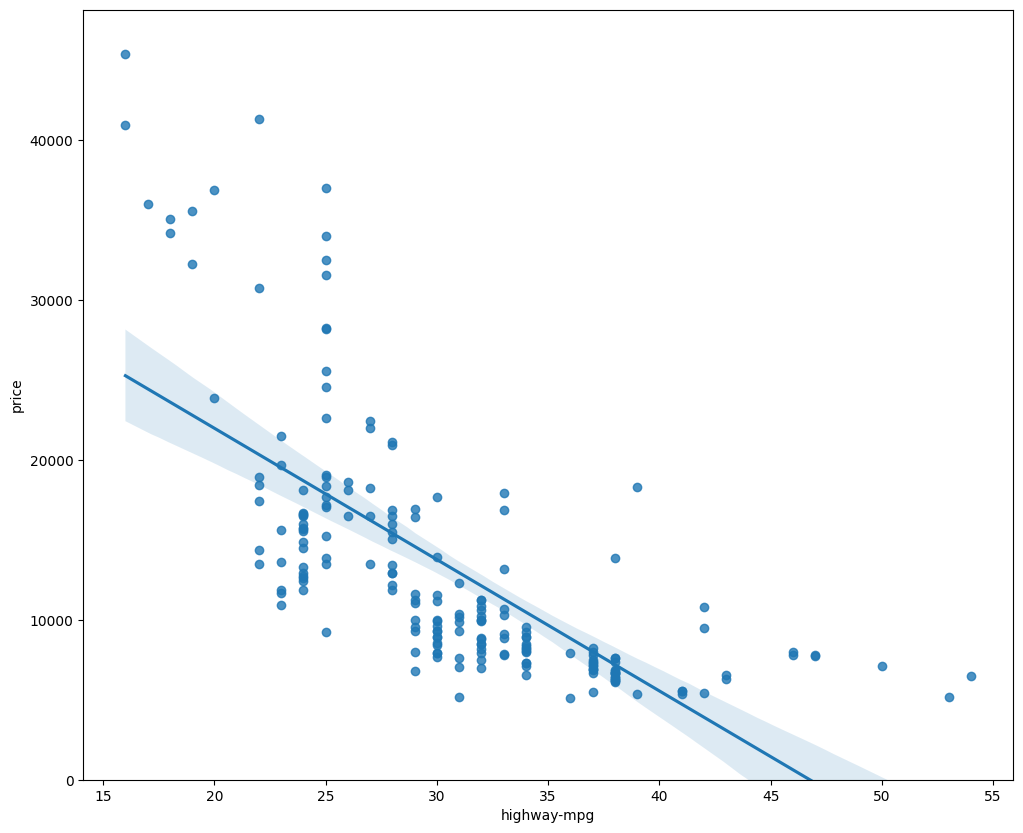

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [33]:
# We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

# One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data 
# points are around the regression line. This will give you a good indication of the variance of the data 
# and whether a linear model would be the best fit or not. If the data is too far off from the line, this 
# linear model might not be the best model for this data.

# Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

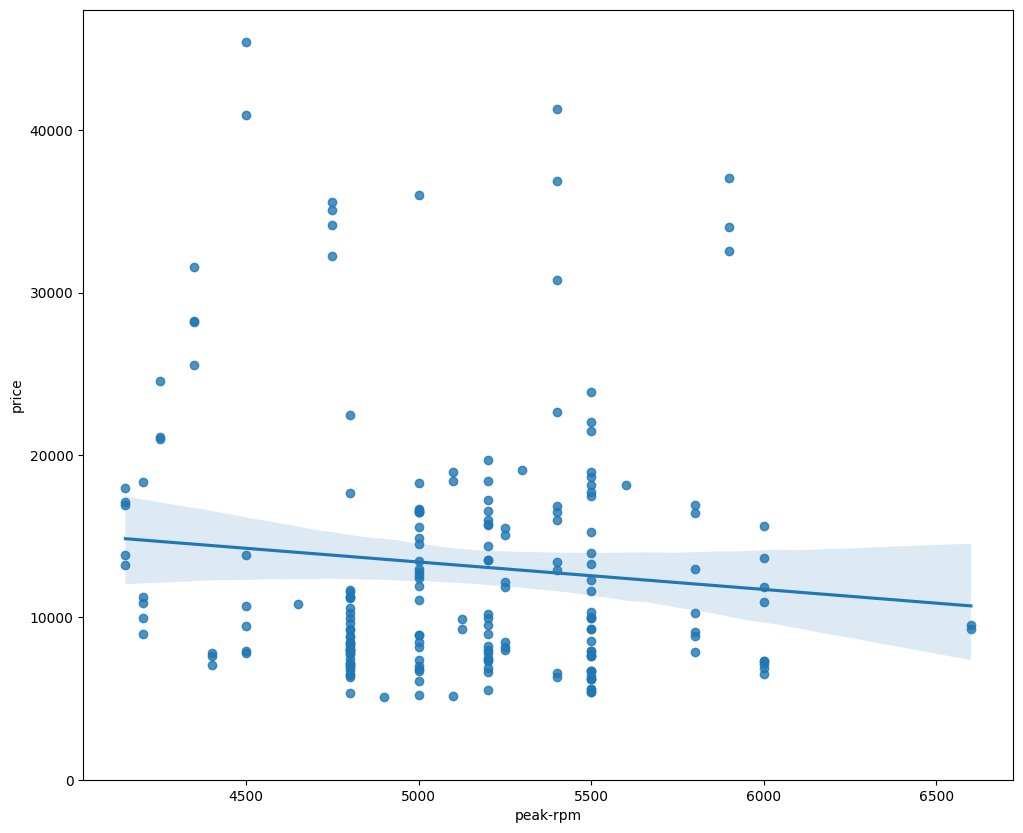

In [34]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [35]:
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated 
# with "price"? Use the method ".corr()" to verify your answer.
df[['peak-rpm', 'highway-mpg', 'price']].corr()



# The variable "highway-mpg" has a stronger correlation with "price", it is 
# approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [36]:
# Residual plot
# What is a residual?

# The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
# When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

# So what is a residual plot?

# A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable 
# on the horizontal x-axis.

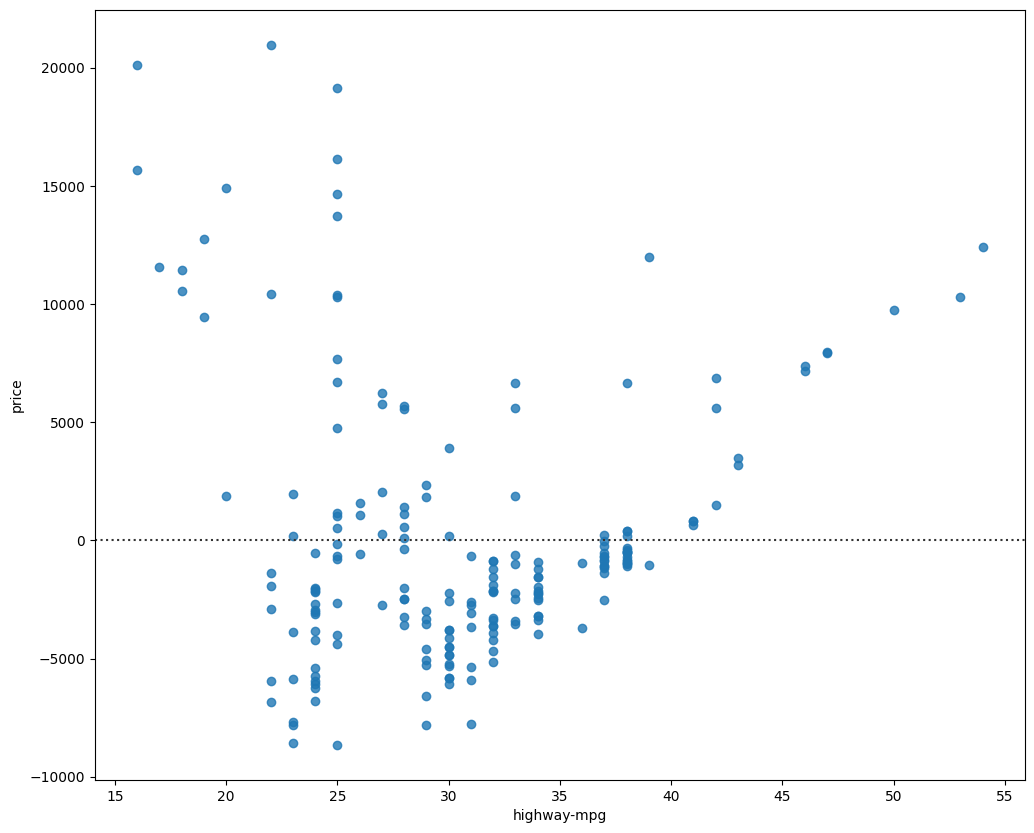

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x = df['highway-mpg'], y=df['price'])
plt.show()

In [39]:
# What is this plot telling us?

# We can see from this residual plot that the residuals are not randomly spread around the x-axis, 
# leading us to believe that maybe a non-linear model is more appropriate for this data.